[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bulyn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


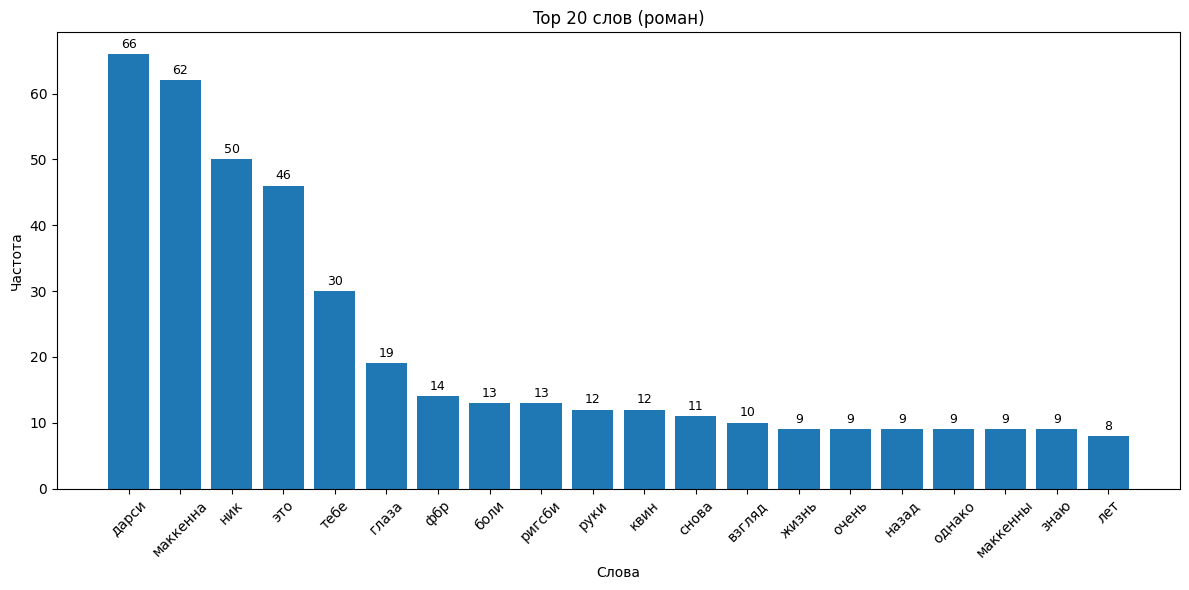

[роман] Математическое ожидание: 21.00, Среднеквадратичное отклонение: 18.51


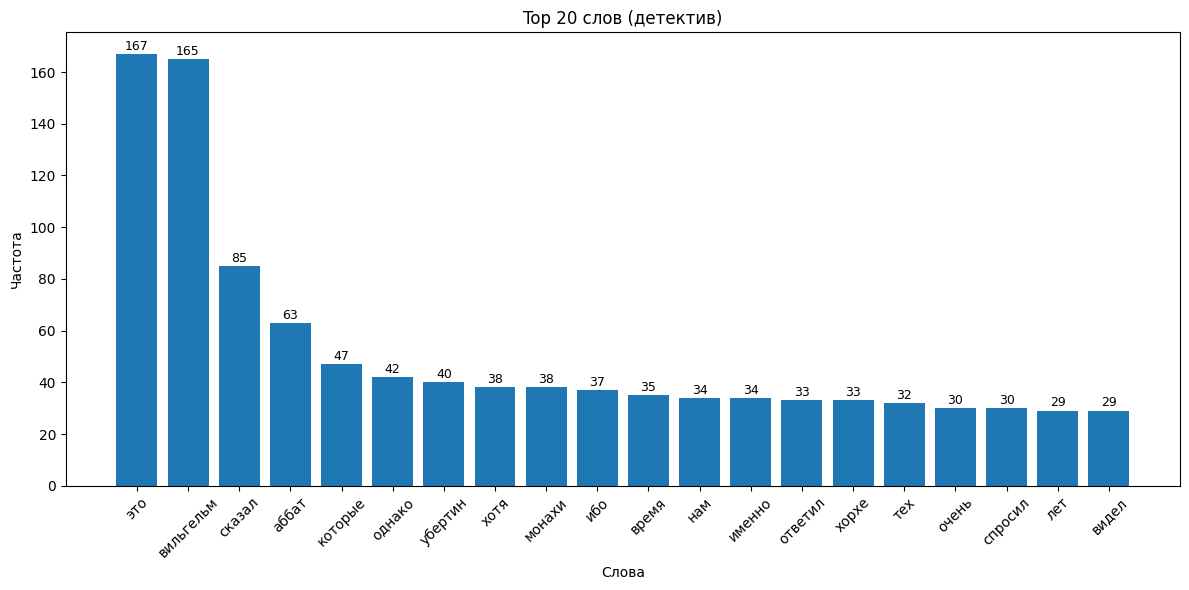

[детектив] Математическое ожидание: 52.05, Среднеквадратичное отклонение: 40.11


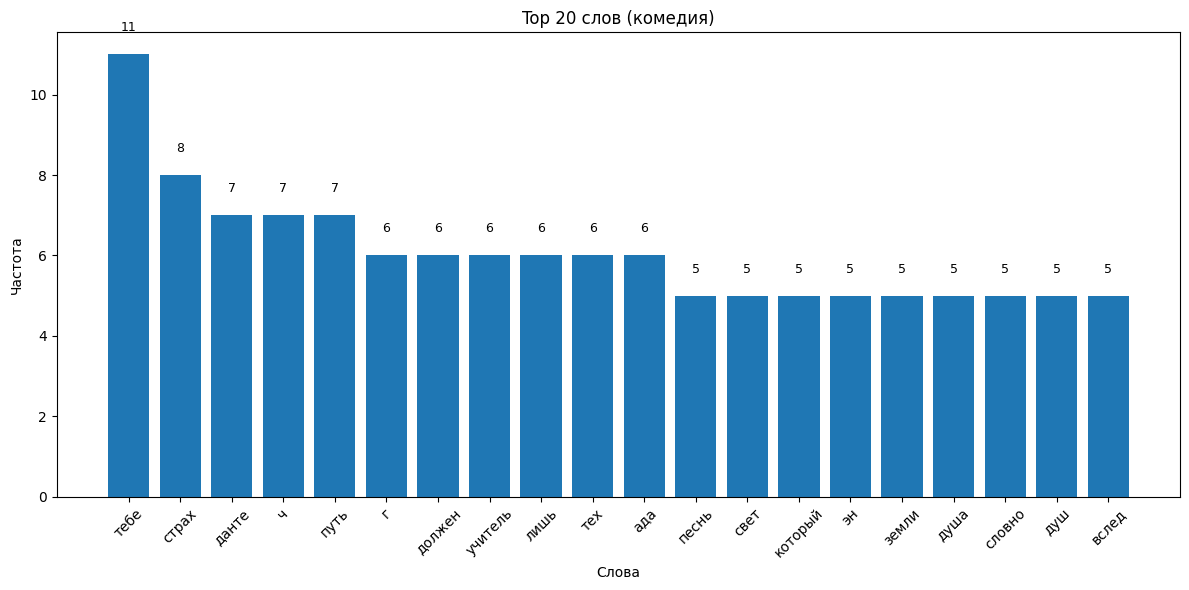

[комедия] Математическое ожидание: 6.05, Среднеквадратичное отклонение: 1.43
Общих слов не найдено.


In [ ]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import string
import os

nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words("russian"))

def process_text(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation + '«»—…“”'))
    words = text.split()
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return Counter(words)

def plot_frequency(counter, N=20, title=""):
    common = counter.most_common(N)
    words, freqs = zip(*common)

    # Построение графика
    plt.figure(figsize=(12, 6))
    bars = plt.bar(words, freqs)
    plt.xticks(rotation=45)
    plt.title(f"Top {N} слов ({title})")
    plt.xlabel("Слова")
    plt.ylabel("Частота")

    # Подписи над колонками
    for bar, freq in zip(bars, freqs):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, str(freq),
                 ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Аппроксимация нормальным распределением
    mu, std = norm.fit(freqs)
    print(f"[{title}] Математическое ожидание: {mu:.2f}, Среднеквадратичное отклонение: {std:.2f}")

    return set(words)

# Путь к файлам
files = {
    "роман": "roman.txt",
    "детектив": "detective.txt",
    "комедия": "comedy.txt"
}

results = {}
N = 20  # можно изменить от 15 до 30

for genre, filename in files.items():
    if not os.path.exists(filename):
        print(f"Файл не найден: {filename}")
        continue
    with open(filename, "r", encoding="utf-8") as f:
        text = f.read()
    counter = process_text(text)
    top_words = plot_frequency(counter, N=N, title=genre)
    results[genre] = top_words

# Поиск пересечений
if len(results) == 3:
    common_words = set.intersection(*results.values())
    if common_words:
        print(f"Общие ключевые слова в топ-{N} всех жанров: {common_words}")
    else:
        print("Общих слов не найдено.")
else:
    print("Не все тексты были обработаны.")


In [4]:
results[genre]

{'ада',
 'вслед',
 'г',
 'данте',
 'должен',
 'душ',
 'душа',
 'земли',
 'который',
 'лишь',
 'песнь',
 'путь',
 'свет',
 'словно',
 'страх',
 'тебе',
 'тех',
 'учитель',
 'ч',
 'эн'}